In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
Files=files.upload()

Saving mcdonalds.csv to mcdonalds.csv


In [ ]:
df=pd.read_csv('mcdonalds.csv')

In [ ]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


First we explore the key characteristics of the data set by loading the data set and
inspecting basic features such as the variable names, the sample size, and the first
three rows of the data:

In [ ]:
#size of data
df.shape

(1453, 15)

In [ ]:
#columns in data
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
#first three observations
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female


First we extract the first eleven columns from the data set because these columns
contain the segmentation variables, and convert the data to a matrix. Then we
identify all YES entries in the matrix. This results in a logical matrix with entries
TRUE and FALSE. Adding 0 to the logical matrix converts TRUE to 1, and FALSE
to 0.

In [ ]:
MD=df.iloc[:,0:11].replace("Yes",1).replace("No",0)

In [ ]:
np.round(MD.mean(),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [ ]:
from sklearn.decomposition  import PCA
pca=PCA()
md_pca=pca.fit_transform(MD)
md_pca

sd=np.sqrt(pca.explained_variance_)
pr_var=pca.explained_variance_ratio_

index=[]
index = [f"PC{i}" for i in range(len(sd))]

sum=pd.DataFrame({
    "Standard deviation":sd,
    "Proportion of Variance":pr_var,
    "Cumulative Proportion":pr_var.cumsum()},
                 index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC0,0.757050,0.299447,0.299447
PC1,0.607456,0.192797,0.492244
PC2,0.504619,0.133045,0.625290
PC3,0.398799,0.083096,0.708386
PC4,0.337405,0.059481,0.767866
PC5,0.310275,0.050300,0.818166
PC6,0.289697,0.043849,0.862015
PC7,0.275122,0.039548,0.901563
PC8,0.265251,0.036761,0.938323
PC9,0.248842,0.032353,0.970677


In [ ]:
print("Standard Deviation:\n",sd.round(1))

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [ ]:
load = (pca.components_)
i=0
rot_matrix = pca.fit(MD).components_.T

rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
rot_df= np.round(-rot_df,3)
rot_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


Text(120.72222222222221, 0.5, 'Original Features')

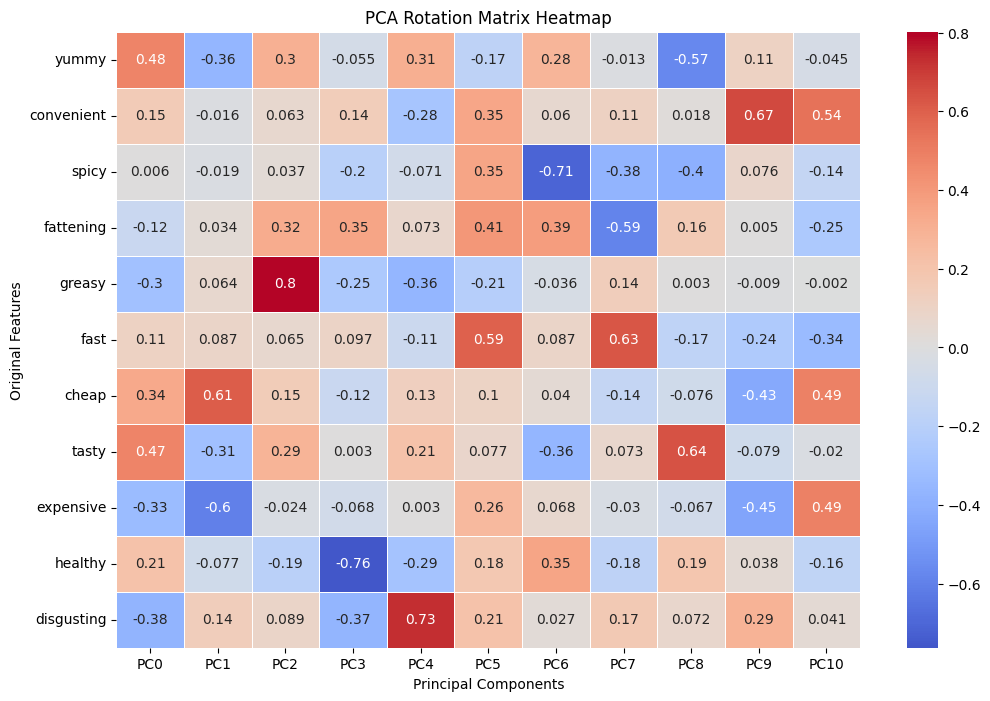

In [ ]:
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(rot_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Add labels and title
plt.title('PCA Rotation Matrix Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')


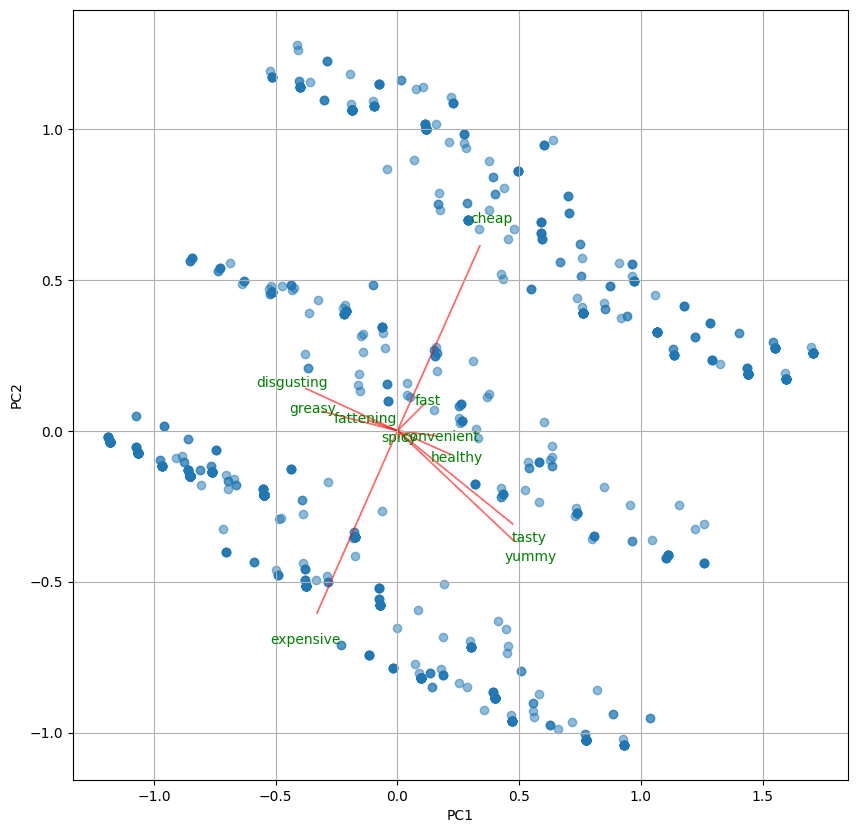

In [ ]:
loadings = pca.components_.T

# Define function to create a biplot
def biplot(score, coeff, labels=None, var1=0, var2=1):
    xs = score[:, var1]
    ys = score[:, var2]

    n = coeff.shape[0]

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.scatter(xs, ys, alpha=0.5)

    for i in range(n):
        ax.arrow(0, 0, coeff[i, var1], coeff[i, var2], color='r', alpha=0.5)
        if labels is None:
            ax.text(coeff[i, var1] * 1.15, coeff[i, var2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            ax.text(coeff[i, var1] * 1.15, coeff[i, var2] * 1.15, labels[i], color='g', ha='center', va='center')

    ax.set_xlabel(f"PC{var1+1}")
    ax.set_ylabel(f"PC{var2+1}")
    ax.grid()

    return fig, ax

# Call the biplot function
fig, ax = biplot(MD_pca, -loadings, labels=MD.columns.values)

plt.show()



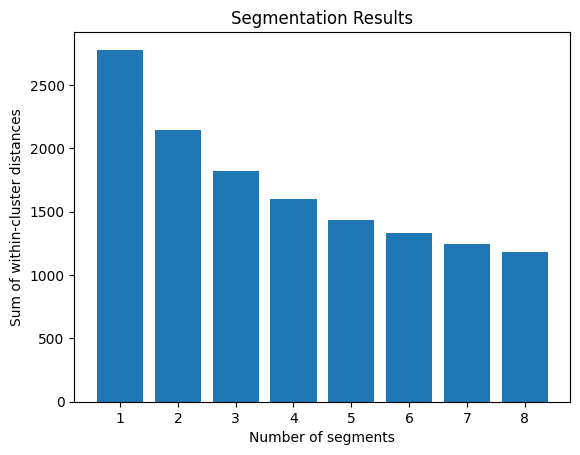

In [ ]:
from sklearn.cluster import KMeans
# Set the random seed for reproducibility
np.random.seed(1234)


nrep = 10
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

# Run K-means clustering for each number of clusters
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append(kmeans.inertia_)
    MD_km28[str(k)] = kmeans

# Plot the results
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


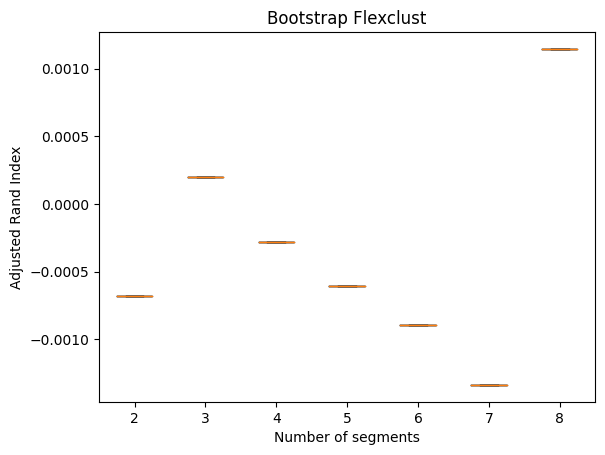

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()


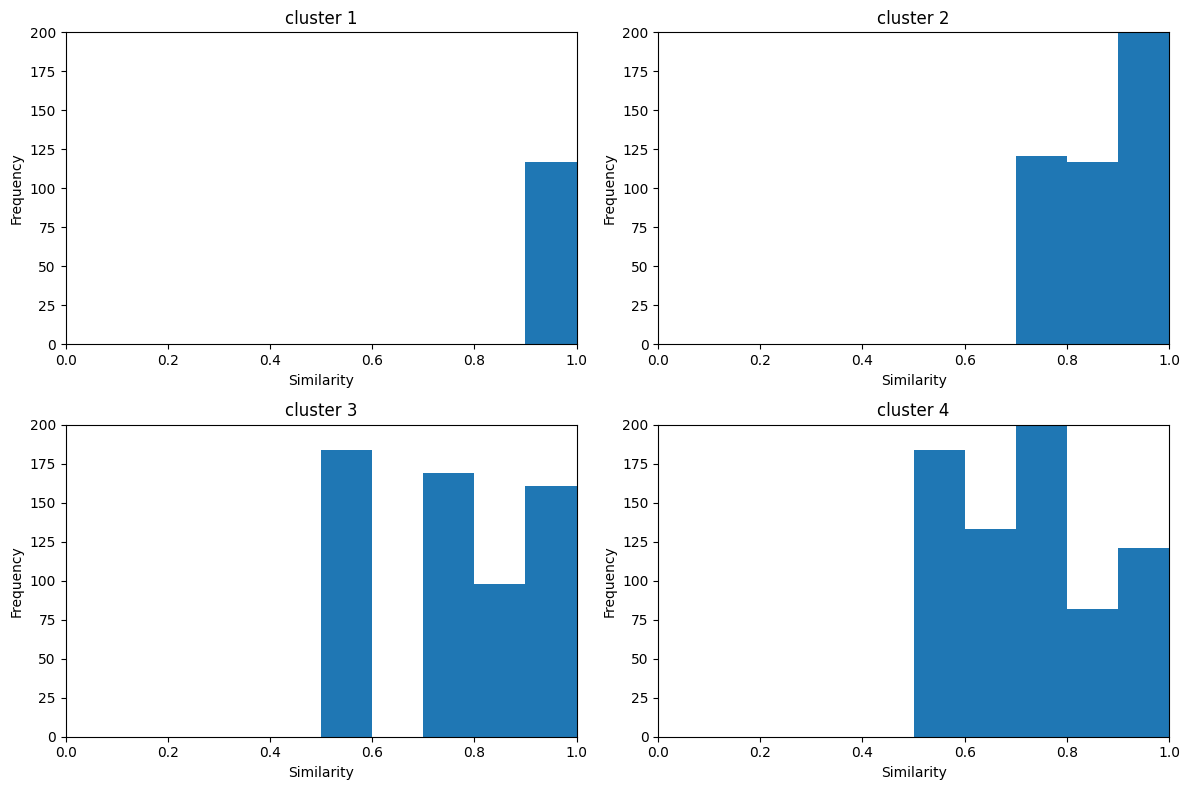

In [ ]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

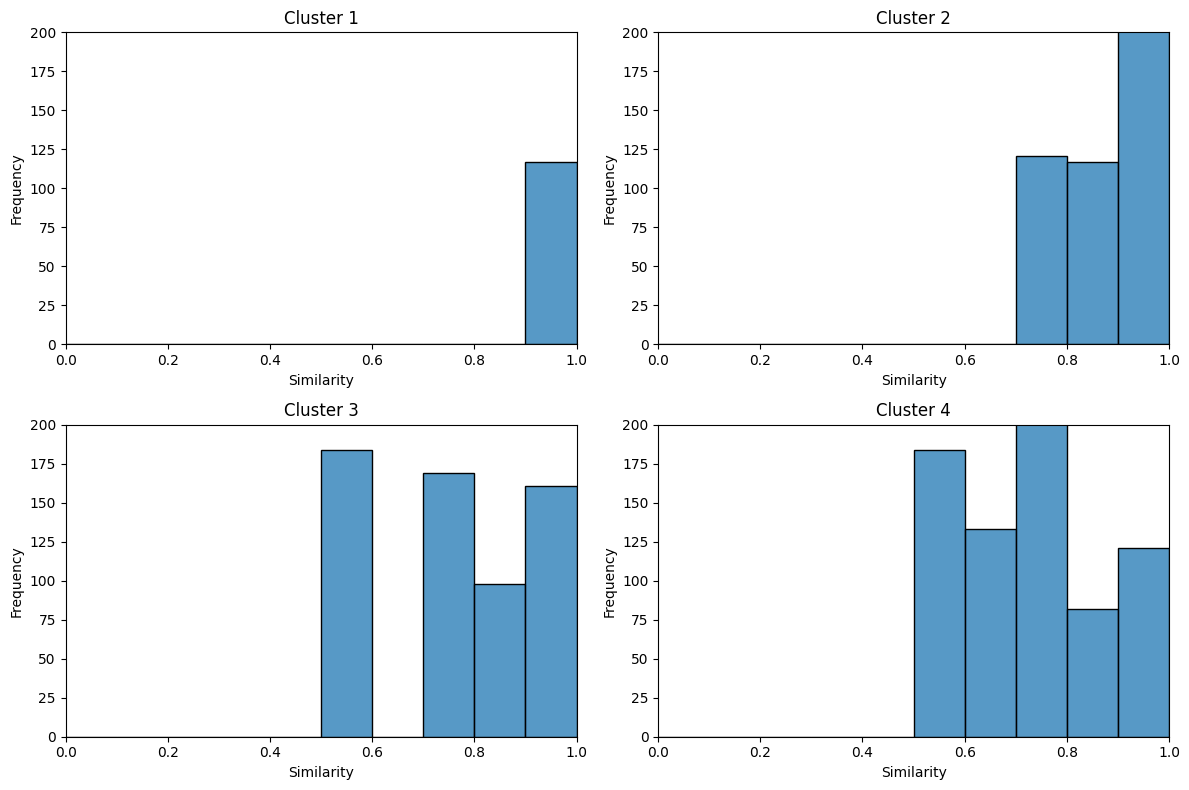

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Assuming MD is your data matrix (a DataFrame or NumPy array)
# Example:
# MD = pd.DataFrame(data, columns=['feature1', 'feature2', 'feature3', ...])

# Set the random seed for reproducibility
np.random.seed(1234)

# Assuming MD_km28 is a dictionary containing fitted KMeans models for different number of clusters (1 to 4)
# Example MD_km28:
# MD_km28 = {'1': KMeans(n_clusters=1), '2': KMeans(n_clusters=2), '3': KMeans(n_clusters=3), '4': KMeans(n_clusters=4)}

# Define range values, number of bins, and maximum frequency for the histograms
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop through cluster numbers 1 to 4
for i in range(1, 5):
    # Predict the cluster labels for the data points
    labels = MD_km28[str(i)].predict(MD)
    # Calculate similarities (minimum distance to any cluster center)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    # Determine row and column index for the subplot
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Create a histogram for similarities using Seaborn
    sns.histplot(similarities, bins=num_bins, binrange=range_values, ax=axs[row, col], kde=False)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Cluster {i}')

    # Set limits for x-axis and y-axis
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    # Set custom ticks for the x-axis
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Adjust layout to prevent overlap
plt.tight_layout()
# Display the plot
plt.show()


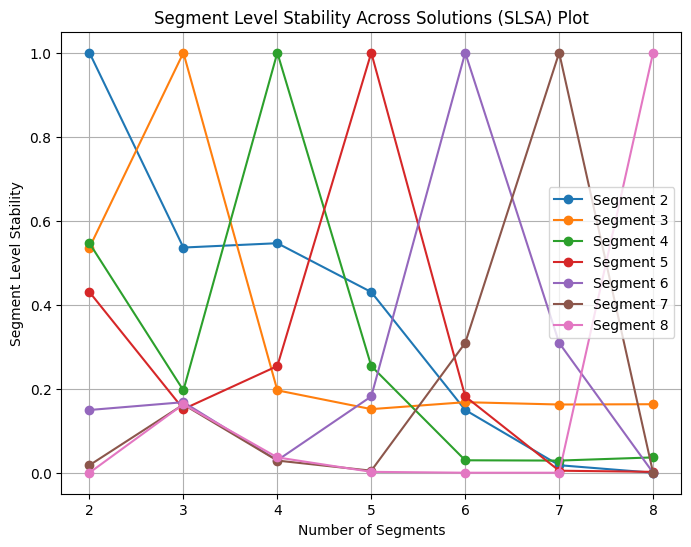

In [ ]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

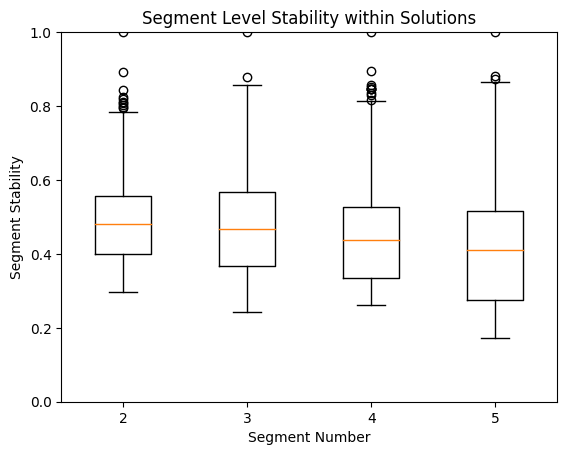

In [ ]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()


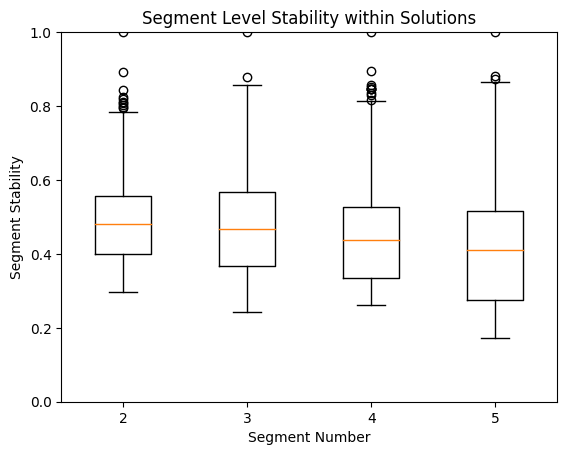

In [ ]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()


In [ ]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


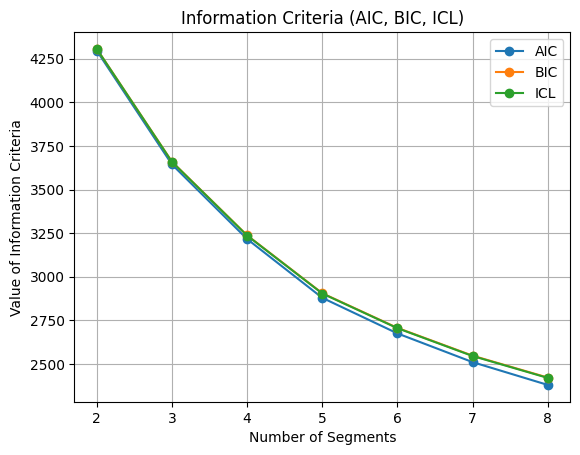

In [ ]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Log-likelihood for MD.m4a: 10.358695770770932
Log-likelihood for MD.m4: 4.848114380157346
Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: count, dtype: int64


In [ ]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)


like_n_counts = df['Like.n'].value_counts()


print(like_n_counts)

Like.n
 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [ ]:
from patsy import dmatrices

independent_vars = df.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [ ]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


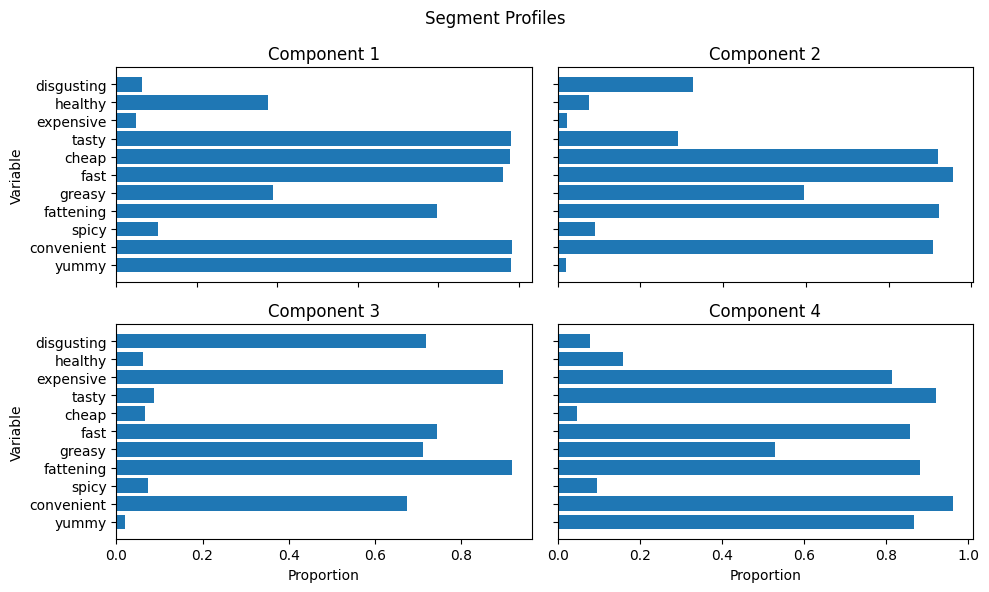

In [ ]:
kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


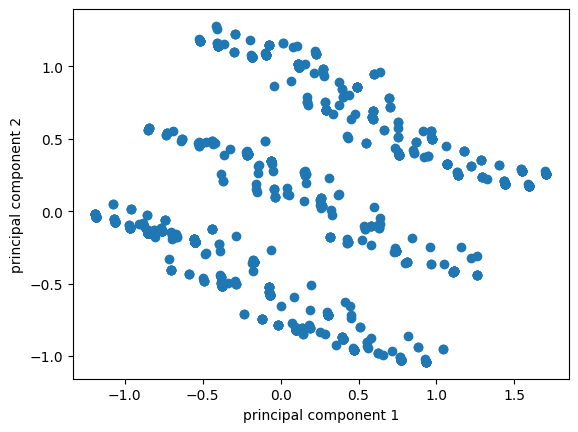

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


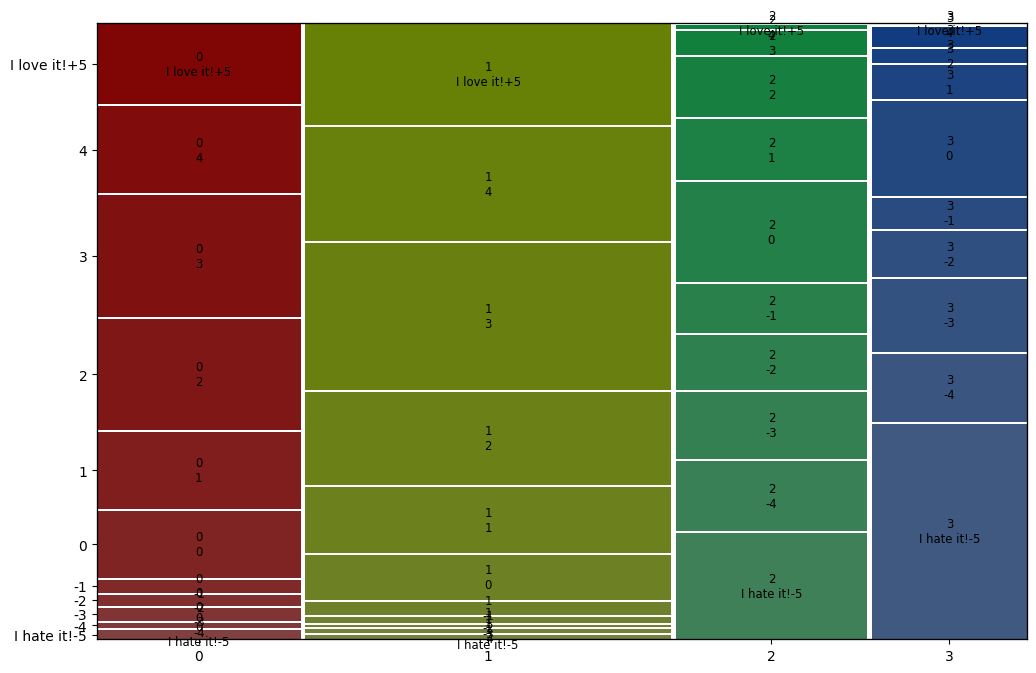

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no
data1=pd.read_csv('mcdonalds.csv')
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(df[x])
    return data1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data1
df_eleven = data1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data1['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(data1['cluster_num'],data1['Like'])
#Reordering cols
data1
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','1','2','3','4','I love it!+5']]
crosstab
plt.rcParams['figure.figsize'] = (12,8)
mosaic(crosstab.stack())
plt.show()

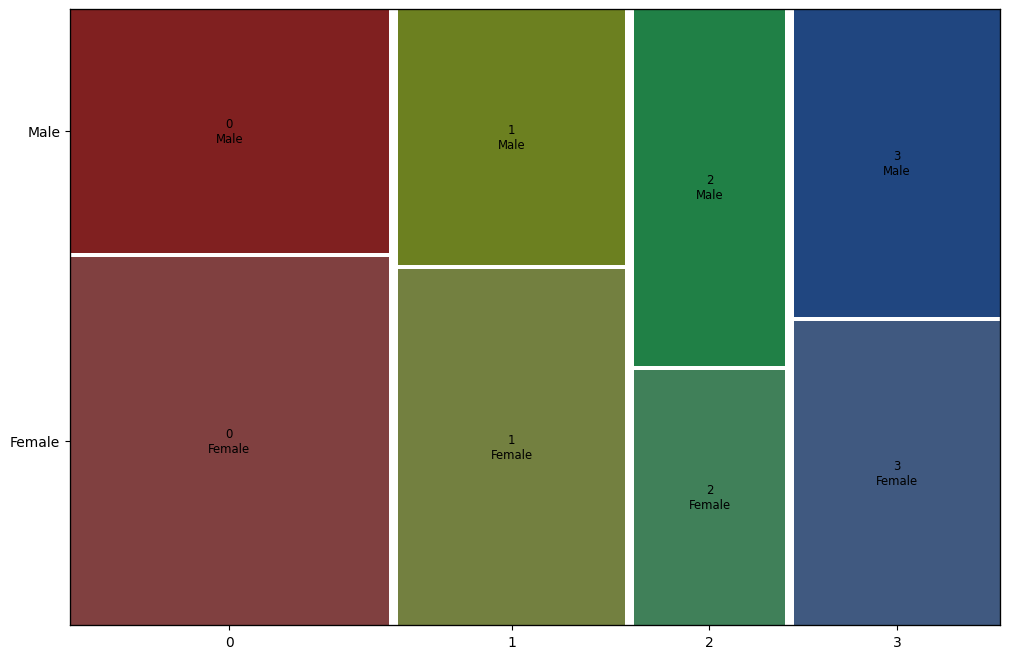

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, df['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

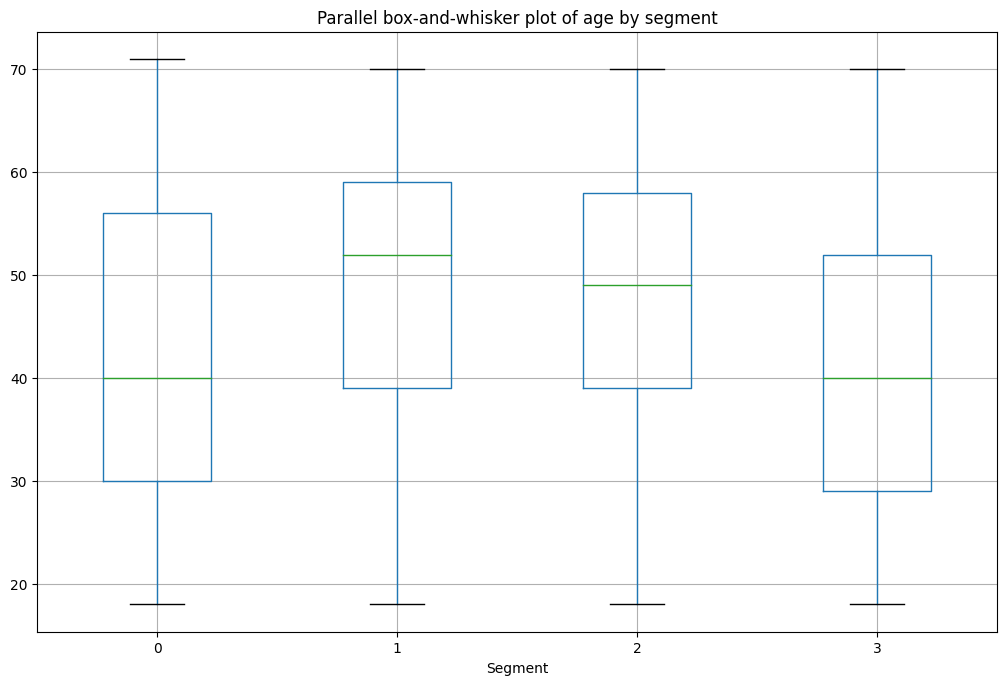

In [ ]:
df1 = pd.DataFrame({'Segment': k4, 'Age': df['Age']})

df1.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [ ]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [ ]:
#Like
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.396285
1,1,6.851724
2,2,4.391447
3,3,5.211382


In [ ]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


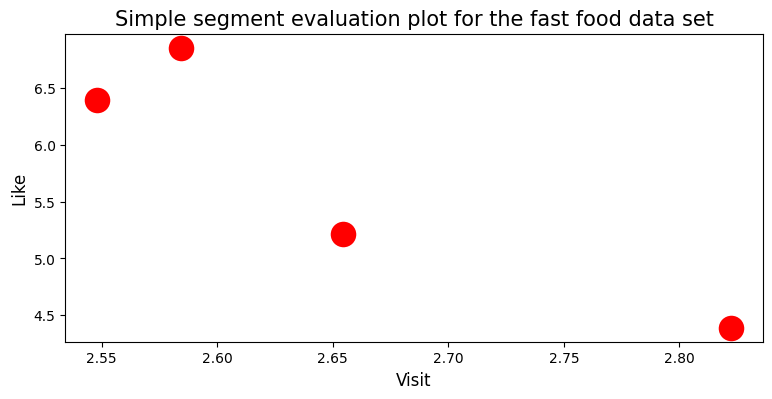

In [ ]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()